## Giugno 2018

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

### Esercizio 0

$q_1,q_2,q_3$ primo, secondo e terzo quartile
### 0.1
Quanto vale $P(X \geq q_2)$? 50\% per definizione di quartile quindi la probabilità è 0,5.
### 0.2
Quanto vale $P(q_1 \leq X \leq q_3)$? primo e terzo sono 25\% e 75\% quindi 0.5


$X \sim Z(\mu,\sigma^2)$

### 0.3.1 $P(|X-\mu| \leq \alpha\cdot\sigma) = 0.5 $ determinare $\alpha$

$P(|Z| \leq \alpha) = 0.5$

$2\Phi(\alpha)-1 = 0.5$

$\Phi(\alpha)= 0.75$

$$\alpha = \Phi^-1(0.75)$$

In [2]:
X = st.norm()
# X.cdf(a) = 0.75
X.ppf(0.75)

0.6744897501960817

### 0.3.2
$q_1,q_2$ in funzione dei parametri di X

$P(X < x) = 0.25$
$P(Z < \frac{x-\mu}{\sigma})$

### 0.3.3

In [3]:
mu =1 
sigma = 1 
Z = st.norm(mu,sigma)

### 0.3.4
$P(|X- \mu| < 2\sigma) = 0.95$

In [4]:
X = st.norm()
X.cdf(2) - X.cdf(-2)

0.9544997361036416

### Esercizio 1

In [5]:
cani = pd.read_csv('cani.csv', delimiter=";",decimal=",")
cani.columns

Index(['Cartella', 'IP', 'GravitaIP', 'EtaAnni', 'MORTE', 'MC', 'SURVIVALTIME',
       'Terapia', 'Antiaritmico', 'PesoKg', 'VTricuspide', 'AsxAo', 'OndaE',
       'OndaEA', 'FrazEspuls', 'FrazAccorc', 'EDVI', 'ESVI', 'Allodiast',
       'Allosist'],
      dtype='object')

### 1.1

In [6]:
len(cani)

161

### 1.2

In [7]:
caniIP = cani[cani['IP'] == "SI"]
len(caniIP)

58

### 1.3.1

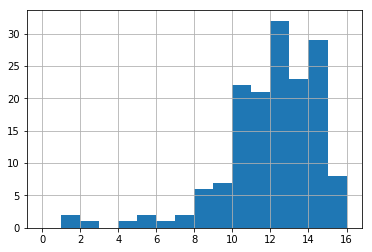

In [8]:
età = cani['EtaAnni']
bins = np.arange(0,età.max(),1)
età.hist(bins = np.hstack(bins))
plt.show()

### 1.3.2

In [9]:
print(età.min(),età.mean(),età.var(),età.max())

1.22 12.124658385093174 6.905200038819876 16.84


### 1.3.3

In [10]:
mask1 = età < 13
mask2 = età >= 12
len(età[ mask1 & mask2])

32

### 1.3.4 

In [11]:
età.max()

16.84

### 1.3.5

In [12]:
età.mode()

0    14.25
1    14.73
dtype: float64

### 1.4.1

In [13]:
len(cani[cani['MORTE'] == 1])

118

### 1.4.2

In [14]:

cani[cani.MORTE == 1].MC.isna().value_counts()

False    115
True       3
Name: MC, dtype: int64

### 1.4.3

In [15]:
mask1 = cani.MORTE == 0
mask2 = cani.MC == 1
len(cani[mask1 & mask2])

0

### 1.4.4

In [16]:
len(cani[cani.MC == 1])

87

### 1.4.4

In [17]:

morti = cani[cani.MORTE == 1]
len(morti[morti.MC == 1])/len(morti)

0.7372881355932204

### 1.5.1

In [18]:
gip = cani.GravitaIP
print('ordinale')

ordinale


### 1.5.2

In [19]:
gip.unique()

array([0, 1, 2, 3], dtype=int64)

### 1.5.4

In [20]:
fgip = pd.crosstab(index=gip,colnames=[''],columns=['Frequenza Relativa'],normalize=True)
fgip

,Frequenza Relativa
GravitaIP,
0,0.639752
1,0.180124
2,0.111801
3,0.068323


### 1.5.4

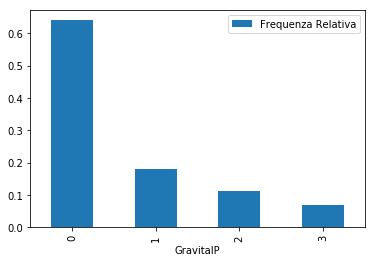

In [21]:
fgip.plot.bar()
plt.show()

### Esercizio 2

### 2.1

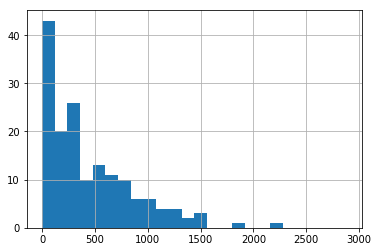

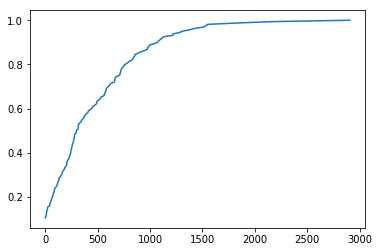

In [22]:
surv = cani.SURVIVALTIME
bins = np.arange(0,surv.max(),120)
surv.hist(bins = np.hstack(bins))
plt.show()

surv.value_counts(normalize=True).sort_index().cumsum().plot()
plt.show()

### 2.2 

In [23]:
surv.mean()

459.888198757764

### 2.3
$$T_n = \sum_{i=1}^n \frac{X_i}{n}$$

### 2.4
Non è distorto in quanto la media campionaria, che è lo stimatore utilizzato non è mai distorto rispetto al valore atteso.
$$E(T_n) = E(\frac{1}{n}\sum X_i) = \frac{1}{n} \sum E(X_i) = \frac{1}{n} nE(X) = E(X) $$

### 2.5 
$$Var(T_n) = \frac{Var(X)}{n}$$
$$\sigma(T_n) = \sqrt{\frac{Var(X)}{n}} = \frac{\sigma}{\sqrt{n}}$$

### 2.6

In [24]:
surv.std()

467.1967063479367

### 2.7
$$P(|T_n-E(X)| < 60) = 0.9$$
$$2\Phi(\frac{60\sqrt{n}}{\sigma})-1 = 0.9$$
$$\Phi(...) = 0.95$$
$$\sqrt{n} = \frac{\Phi^{-1}(0.95)\sigma}{60}$$

In [25]:
X = st.norm()
n = ((X.ppf(0.95)* surv.std())/60)**2
n

164.04067877198327

### 2.8
Dall'esercizio precedente possiamo affermare che la nostra taglia non è sufficiente.

In [26]:
len(surv)

161

### 2.9

In [27]:
(surv/365).mean()

1.2599676678294895

### 2.10
E' non distorto perchè la media campionaria è sempre uno stimatore non distorto

### 2.11

In [28]:
surv.mean()/365

1.2599676678294904

### Esercizio 3

### 3.1
Sono strettamente dipendenti. Vedi il grafico e il valore tendente a 1 dell'indice di correlazione

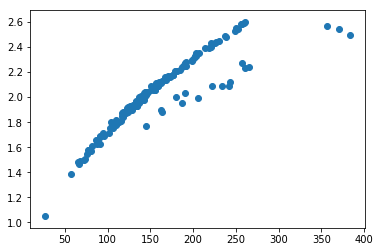

0.9073039817753574

In [29]:
EDVI  = cani.EDVI
Allodiast = cani.Allodiast
plt.scatter(EDVI,Allodiast)
plt.show()
EDVI.corr(Allodiast)

### 3.2
Guardando l'istogramma e i valori di media e mediana simili posso affermare che segue una legge normale

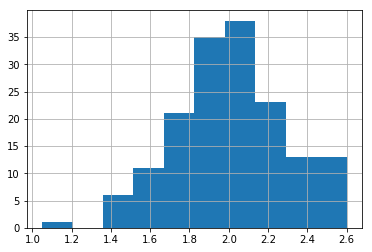

In [30]:
Allodiast.hist()
plt.show()

In [31]:
Allodiast.describe()

count    161.000000
mean       2.013354
std        0.279596
min        1.050000
25%        1.850000
50%        2.000000
75%        2.180000
max        2.600000
Name: Allodiast, dtype: float64

In [32]:
### 3.3

In [33]:
print(Allodiast.mean(),Allodiast.median())

2.0133540372670815 2.0
